In [2]:
import os
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
ROOT_PATH = "/Users/isohrab/Documents/tensorflow/trafficSigns"

def load_data(data_path):
    directories = [d for d in os.listdir(data_path)
                   if os.path.isdir(os.path.join(data_path, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_path,d)
        file_names = [os.path.join(label_directory, f)
                      for f in os.listdir(label_directory)
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

train_data_dir = os.path.join(ROOT_PATH, "data/Training")
images, labels = load_data(train_data_dir)


In [4]:
images_array = np.array(images)
labels_array = np.array(labels)

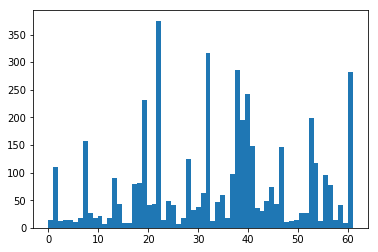

In [5]:
# show a Histogram with bins=length of labels
plt.hist(labels,bins=len(set(labels)))
plt.show()

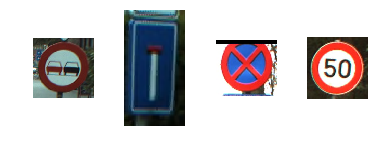

In [6]:
# show 4 random traffic signs
random_traffic_signs = [35, 777, 1500, 3210]
for i,s in enumerate(random_traffic_signs):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    plt.imshow(images_array[s])
    plt.subplots_adjust(wspace=0.5)
plt.show()

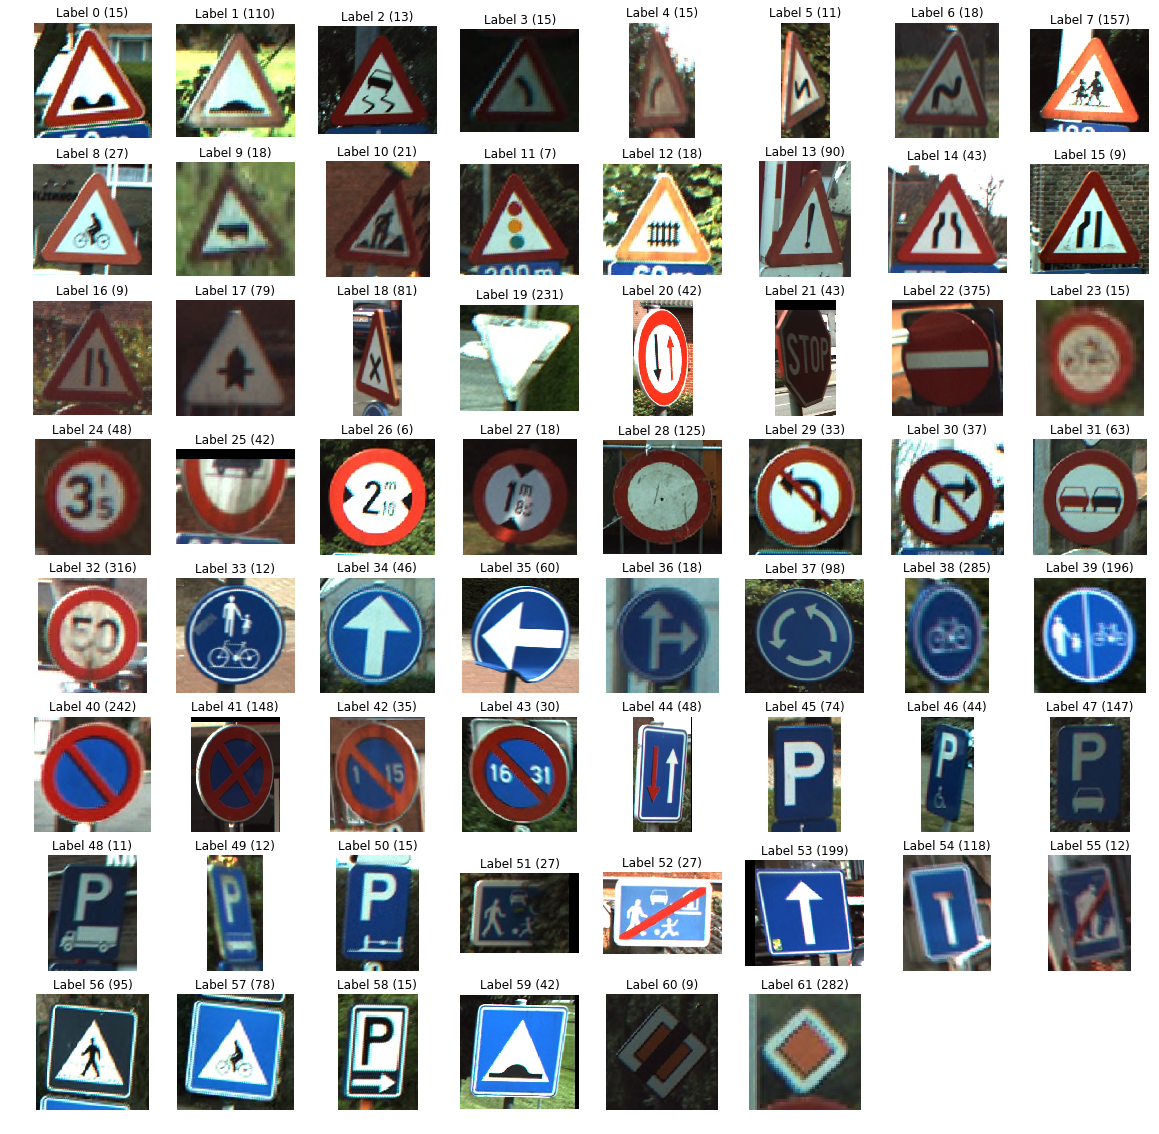

In [9]:
# all unique lebals with their images
unique_labels = set(labels)

plt.figure(figsize=(20,20))

for i, l in enumerate(unique_labels):
    image= images[labels.index(l)]
    plt.subplot(8,8,i+1)
    plt.axis('off')
    plt.title('Label {} ({})'.format(l, labels.count(l)))
    plt.imshow(image)
plt.show()

In [7]:
# transform images to 28x28 pixels
images32 = [transform.resize(image,(32,32)) for image in images]

# change rgb to gray
images32 = np.array(images32)  # rgb2gary need np.array as input
images32 = rgb2gray(images32)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


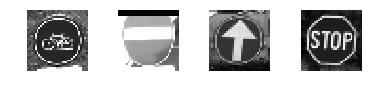

In [8]:
# show resized gray image
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images32[traffic_signs[i]], cmap='gray')
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [9]:
# prepare test set
test_data_dir = os.path.join(ROOT_PATH, "data/Testing")
images_test, labels_test = load_data(test_data_dir)

# transform images to 28x28 pixels
images32_test = [transform.resize(image,(32,32)) for image in images_test]

# change rgb to gray
images32_test = np.array(images32_test)  # rgb2gary need np.array as input
images32_test = rgb2gray(images32_test)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [79]:
# Tensorflow

X = tf.placeholder(tf.float32, shape=[None, 32,32], name="X")
Y = tf.placeholder(tf.int32, shape=[None], name="Y")

# flatten input images
images_flat = tf.contrib.layers.flatten(X)
W1 = tf.Variable(tf.truncated_normal([1024,800]), dtype=tf.float32, name="W1")
b1 = tf.Variable(tf.zeros([1,800]))
W2 = tf.Variable(tf.truncated_normal([800,400]), dtype=tf.float32, name="W2")
b2 = tf.Variable(tf.zeros([1,400]))
W3 = tf.Variable(tf.truncated_normal([400,62]), dtype=tf.float32, name="W3")
b3 = tf.Variable(tf.zeros([1,62]))

Z1 = tf.matmul(images_flat, W1)+b1
A1 = tf.nn.relu(Z1)
Z2 = tf.matmul(A1,W2)+b2
A2 = tf.nn.relu(Z2)
logits = tf.matmul(A2,W3)+b3
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = Y,logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [81]:
num_epoch = 100
batch_size = 64
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for e in range(num_epoch):
        epoch_loss = 0.
        for b in range(int(len(images32)/batch_size)-1):
            x_batch = images32[b*batch_size:b*batch_size+batch_size, :, :]
            y_batch = labels[b*batch_size:b*batch_size+batch_size]
            train_loss, _ = sess.run([loss, train_op],feed_dict={X: x_batch, Y:y_batch})
            epoch_loss +=  train_loss
        acc, val_loss = sess.run([accuracy, loss],{X:images32_test, Y:labels_test})
        print("epoch %d: train cost:%.2f, test cost:%.2f, accuracy:%.2f"%(e,epoch_loss, val_loss, acc))

epoch 0: train cost:264236.27, test cost:1954.51, accuracy:21.42
epoch 1: train cost:146949.95, test cost:1031.80, accuracy:34.11
epoch 2: train cost:103665.57, test cost:787.74, accuracy:30.67
epoch 3: train cost:76102.33, test cost:712.72, accuracy:32.43
epoch 4: train cost:60843.13, test cost:602.16, accuracy:32.26
epoch 5: train cost:47555.69, test cost:527.20, accuracy:32.69
epoch 6: train cost:39668.22, test cost:480.50, accuracy:32.37
epoch 7: train cost:33942.56, test cost:442.73, accuracy:32.54
epoch 8: train cost:29831.64, test cost:412.33, accuracy:32.71
epoch 9: train cost:26794.44, test cost:386.55, accuracy:32.44
epoch 10: train cost:23142.17, test cost:360.22, accuracy:32.68
epoch 11: train cost:20261.59, test cost:343.81, accuracy:32.86
epoch 12: train cost:17991.24, test cost:323.60, accuracy:32.24
epoch 13: train cost:15717.84, test cost:303.08, accuracy:32.44
epoch 14: train cost:13801.01, test cost:290.28, accuracy:32.50
epoch 15: train cost:12686.18, test cost:274.

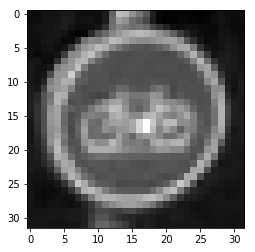

In [84]:
plt.imshow(images32[199], cmap="gray")
plt.show()

1024